In [1]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config['datapath_10G'])


In [2]:
df0 = dd.read_parquet(origin_files)#.repartition(npartitions=1).reset_index(drop=True)

In [3]:
# 查看数据类型
for k in df0.columns:
    print(k, df0[k].dtypes)

id int64
last_login string
user_name string
fullname string
email string
age int64
income float64
gender string
country string
address string
purchase_history string
is_active bool
registration_date string
phone_number string
login_history string


In [4]:
head=df0.head() # 如果repartition会把所有文件读入内存再head，可以看完head再repartition
head

,id,last_login,user_name,fullname,email,age,income,gender,country,address,purchase_history,is_active,registration_date,phone_number,login_history
0,0,2024-12-02T03:49:12+00:00,RKWKCXRZFV,瞿紫玉,kuegujsk@hotmail.com,82,366311.83,女,美国,Non-Chinese Address Placeholder,"{""avg_price"":9496,""categories"":""零食"",""items"":[{...",False,2024-10-31,+1 (804) 855-6279,"{""avg_session_duration"":105,""devices"":[""deskto..."
1,1,2024-08-25T05:39:16+00:00,RCLELJ,李泽宸,wslfszer@126.com,71,833917.30,男,英国,上海市淄博山水路360号,"{""avg_price"":3014,""categories"":""手套"",""items"":[{...",True,2023-01-13,+44 1850 116429,"{""avg_session_duration"":64,""devices"":[""mobile""..."
2,2,2023-12-21T14:28:09+00:00,KSHSK,詹紫玥,gputsgbf@126.com,54,839379.17,女,澳大利亚,北京市东莞保健中心路614号,"{""avg_price"":8921,""categories"":""裙子"",""items"":[{...",True,2022-07-06,+61 656 440 523,"{""avg_session_duration"":116,""devices"":[""deskto..."
3,3,2023-06-06T03:21:09+00:00,CCJMXPJA,姜小红,akidhwzo@outlook.com,18,383963.16,男,巴西,山东省株洲配送中心路176号,"{""avg_price"":939,""categories"":""耳机"",""items"":[{""...",False,2020-03-20,+55 54 34995-1600,"{""avg_session_duration"":25,""devices"":[""mobile""..."
4,4,2024-10-08T11:02:18+00:00,TJRJDNO,童泽楠,suupywzi@qq.com,77,337059.32,男,英国,浙江省赤峰安康路957号,"{""avg_price"":959,""categories"":""手套"",""items"":[{""...",False,2023-01-05,+44 5383 067377,"{""avg_session_duration"":51,""devices"":[""desktop..."


In [5]:
head["purchase_history"][0]

'{"avg_price":9496,"categories":"零食","items":[{"id":7265}],"payment_method":"现金","payment_status":"已支付","purchase_date":"2023-07-30"}'

In [6]:
head["login_history"][0]

'{"avg_session_duration":105,"devices":["desktop","mobile"],"first_login":"2024-12-04","locations":["home","travel"],"login_count":73,"timestamps":["2024-12-04 21:29:00","2024-12-12 20:51:00","2024-12-20 19:00:00","2024-12-28 10:58:00","2025-01-05 06:58:00","2025-01-13 21:55:00","2025-01-21 18:03:00","2025-01-29 18:26:00","2025-02-06 19:31:00","2025-02-14 11:15:00","2025-02-22 06:41:00","2025-03-02 10:10:00","2025-03-10 20:17:00","2025-03-18 20:19:00"]}'

In [ ]:
# 确保运行后面的代码前使用columnParser.py处理了数据

In [3]:
purchased_items_files = pathlib.Path("processed_data_1") / origin_files.name
login_history_files = pathlib.Path("processed_data_2") / origin_files.name
province_history_files = pathlib.Path("processed_data_3") / origin_files.name

df0 = df0.repartition(npartitions=1).reset_index(drop=True)
df1 = dd.read_parquet(purchased_items_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df2 = dd.read_parquet(login_history_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df3 = dd.read_parquet(province_history_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df = dd.concat([df0,df1,df2,df3],axis=1)

In [4]:
df["income_bin"] = utils.create_bins(df, "income", 5)
df["age_bin"] = utils.create_bins(df, "age", 5)
df["avg_price_bin"] = utils.create_bins(df, "avg_price", 5)
df["total_price"] = df["avg_price"]*df["item_count"]
df["total_price_bin"] = utils.create_bins(df, "total_price", 5)

In [4]:
# 查看数据类型
for k in df.columns:
    if k != "id":
        print(k, df[k].dtypes)

last_login string
user_name string
fullname string
email string
age int64
income float64
gender string
country string
address string
purchase_history string
is_active bool
registration_date string
phone_number string
login_history string
avg_price float64
categories string
items object
item_count int64
payment_method string
payment_status string
purchase_date float64
avg_session_duration float64
devices_desktop bool
devices_mobile bool
devices_tablet bool
first_login float64
locations_home bool
locations_travel bool
locations_work bool
login_count int64
timestamps object
province string


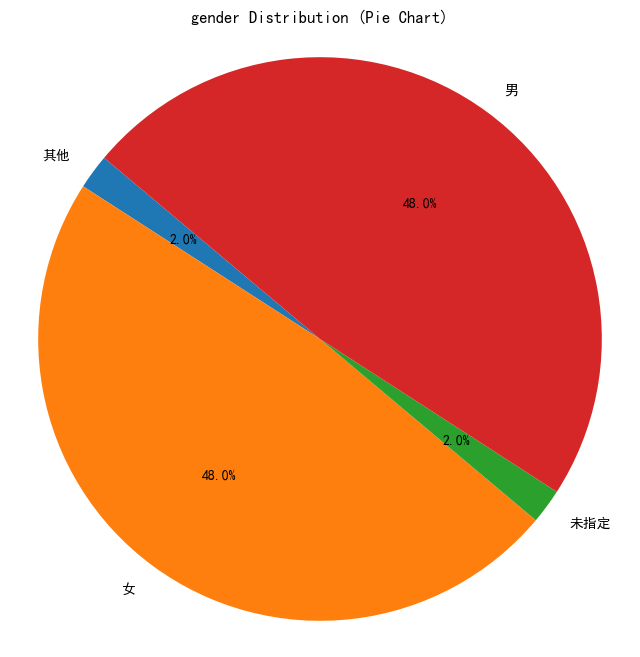

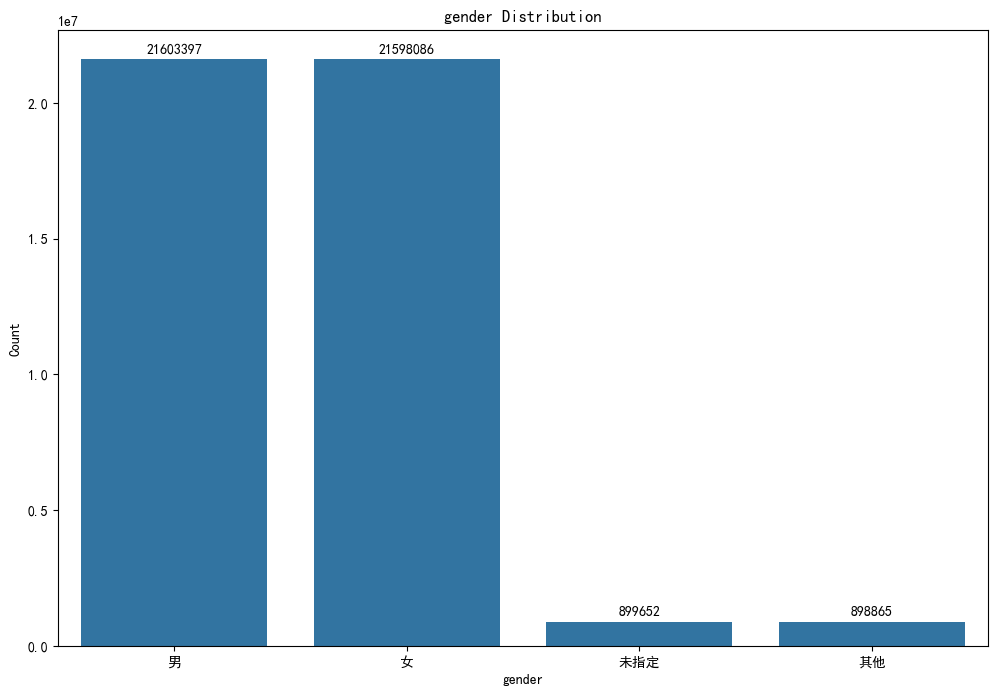

In [5]:
visualizations.draw_pieplot(df,"gender")
visualizations.draw_barplot(df,"gender")

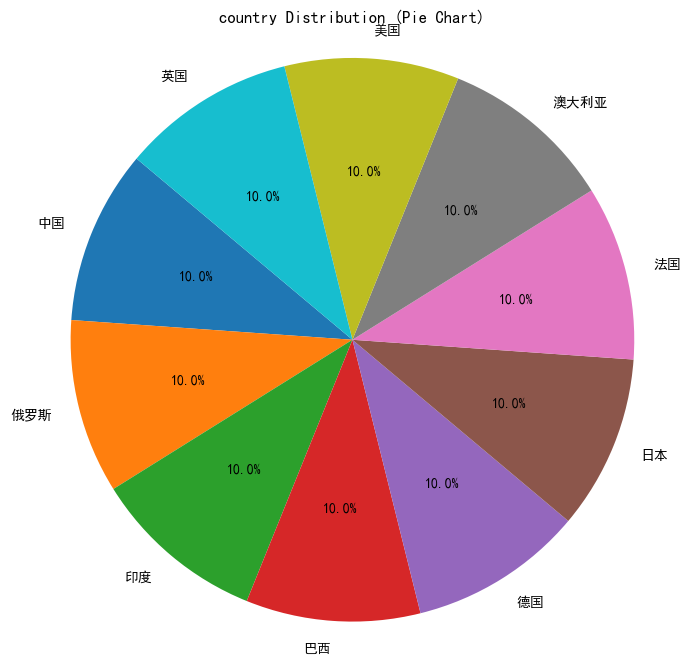

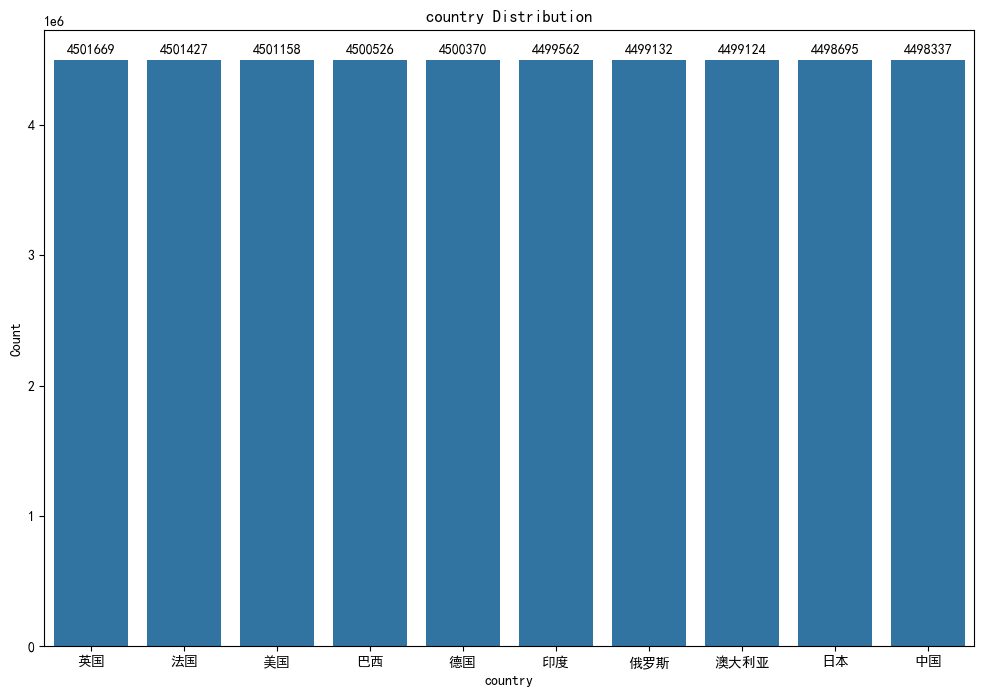

In [6]:
visualizations.draw_pieplot(df,"country")
visualizations.draw_barplot(df,"country")

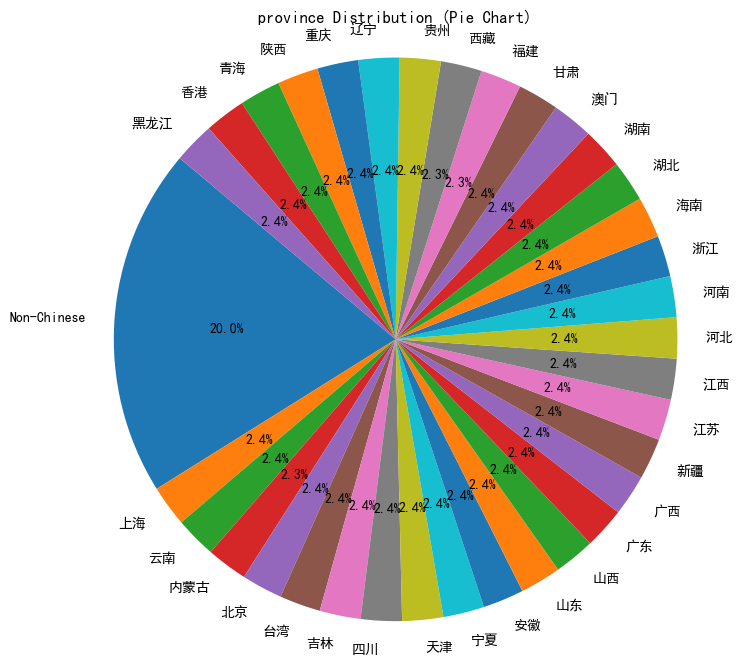

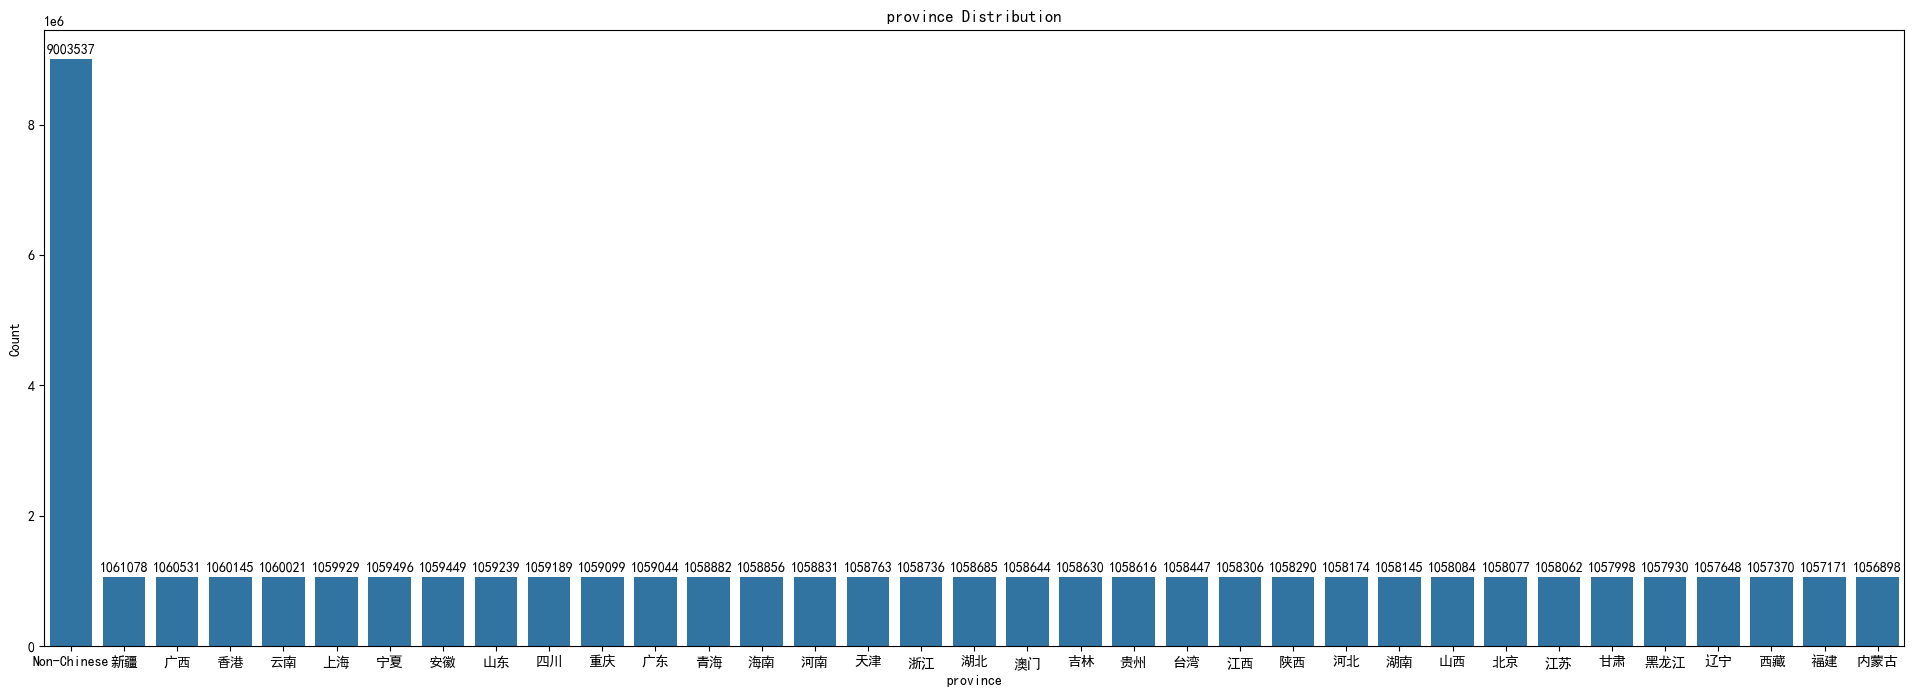

In [7]:
visualizations.draw_pieplot(df,"province")
visualizations.draw_barplot(df,"province",figsize=(24,8))

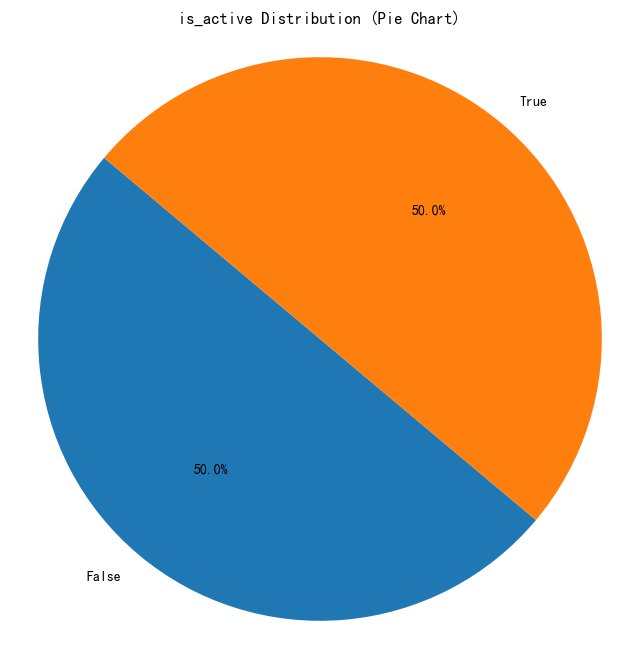

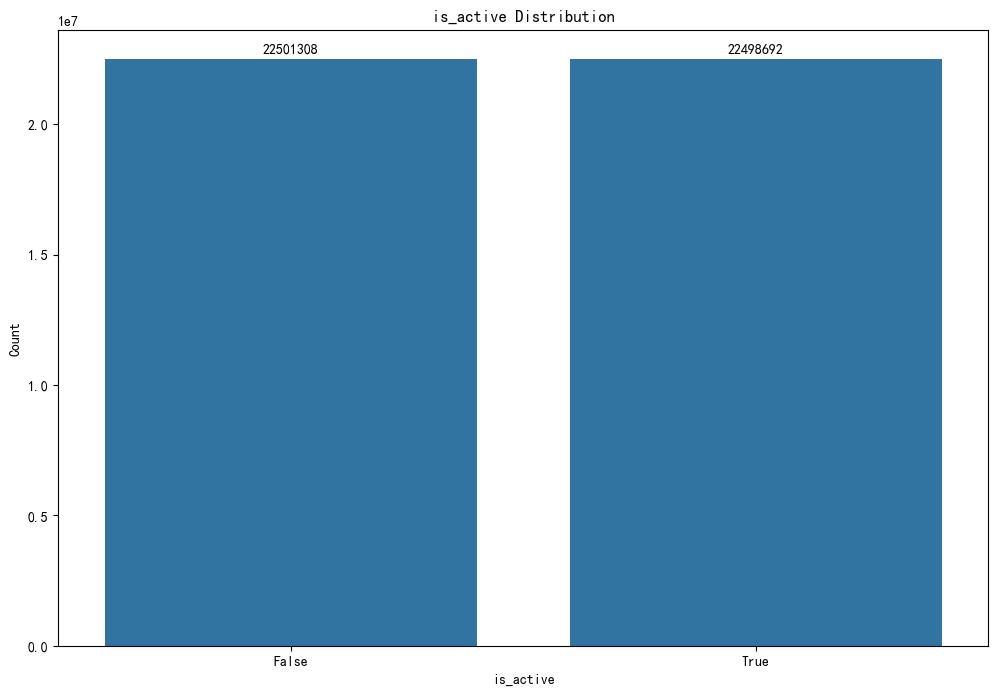

In [8]:
visualizations.draw_pieplot(df,"is_active")
visualizations.draw_barplot(df,"is_active")

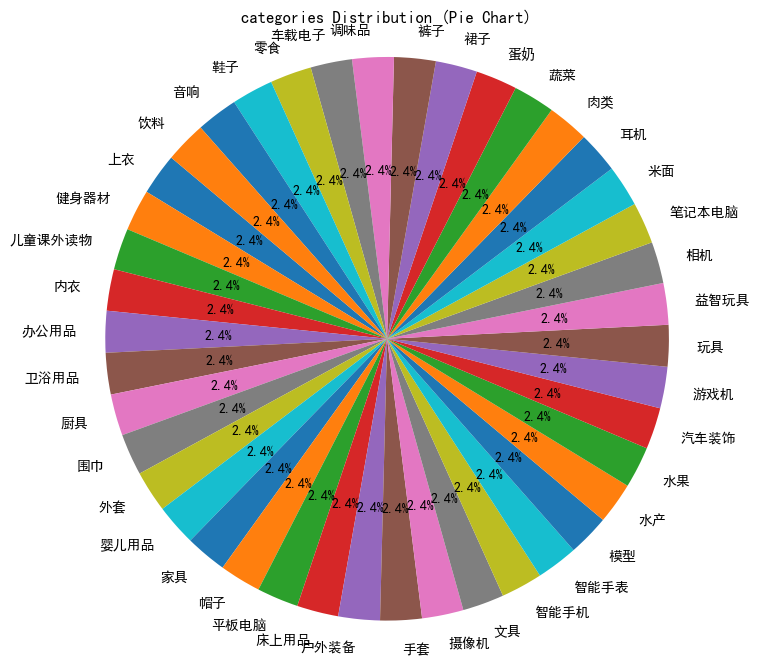

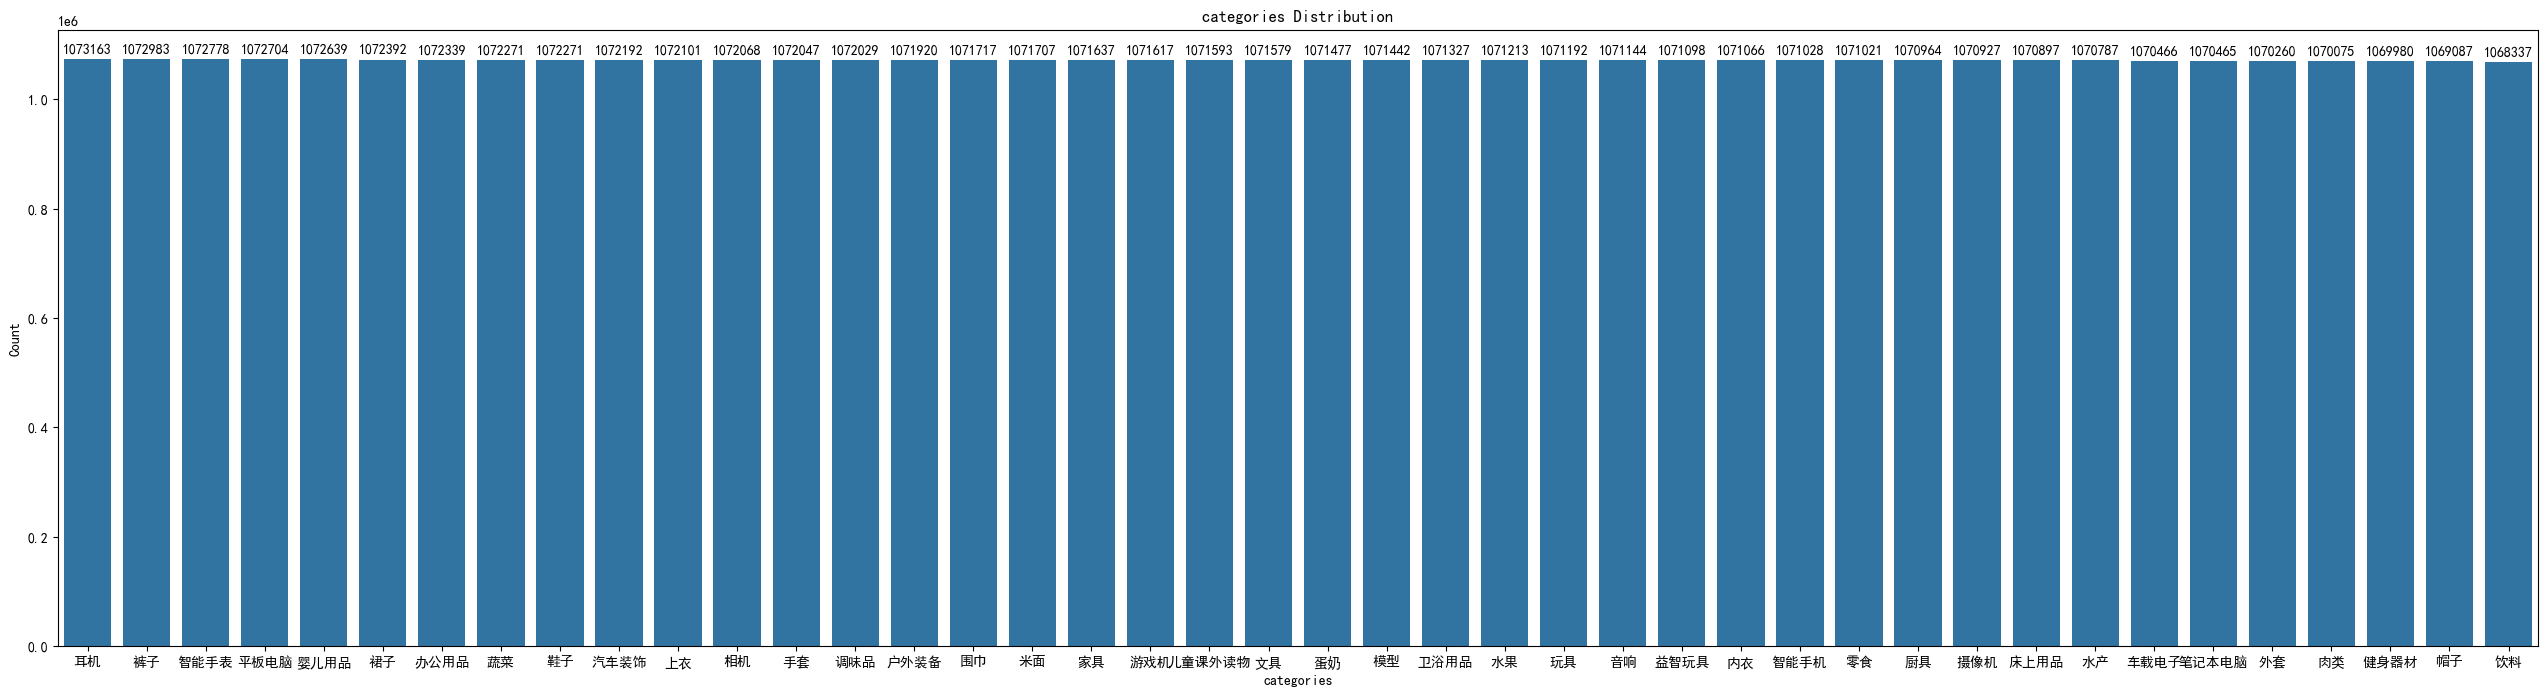

In [9]:
visualizations.draw_pieplot(df,"categories")
visualizations.draw_barplot(df,"categories",figsize=(32,8))

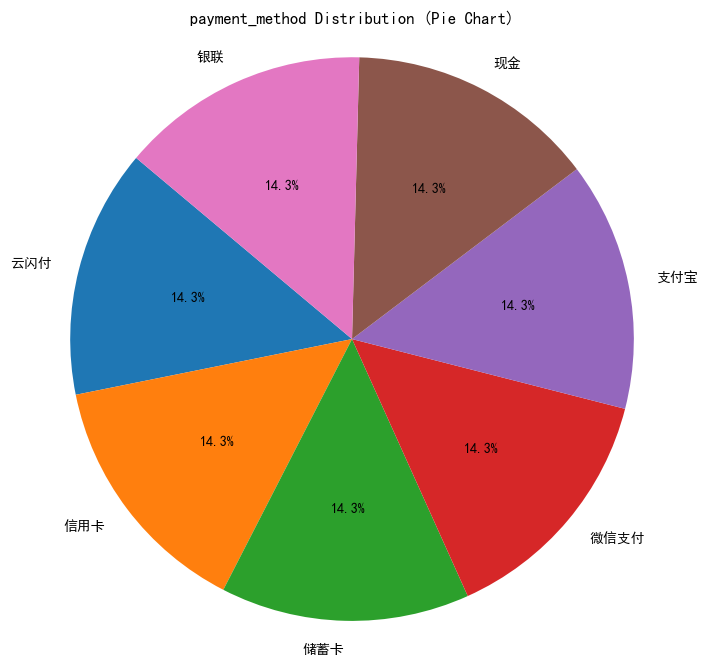

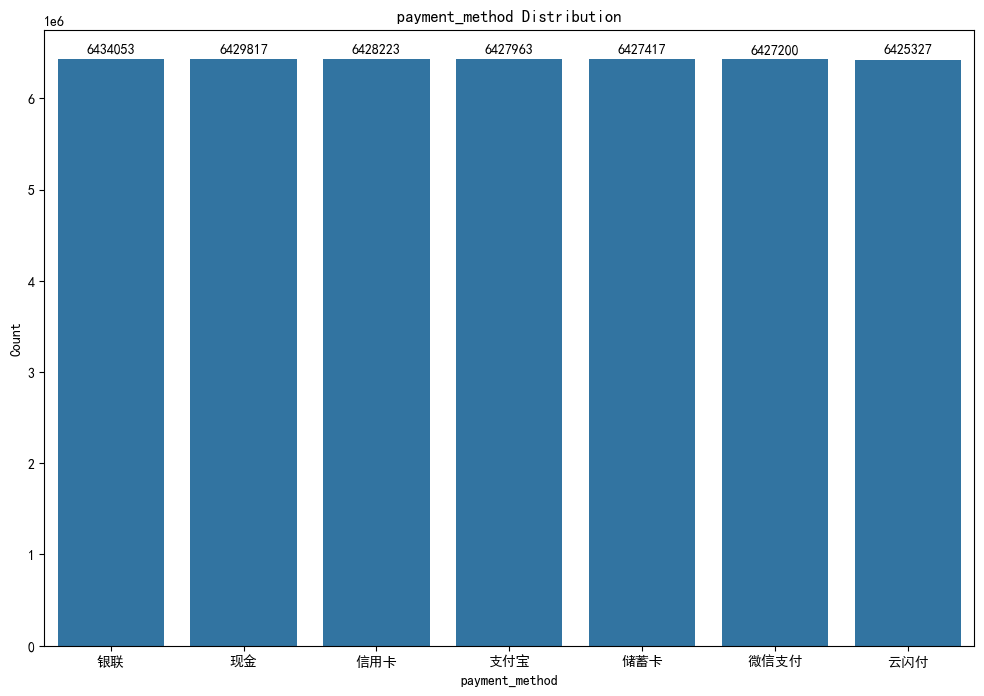

In [10]:
visualizations.draw_pieplot(df,"payment_method")
visualizations.draw_barplot(df,"payment_method")

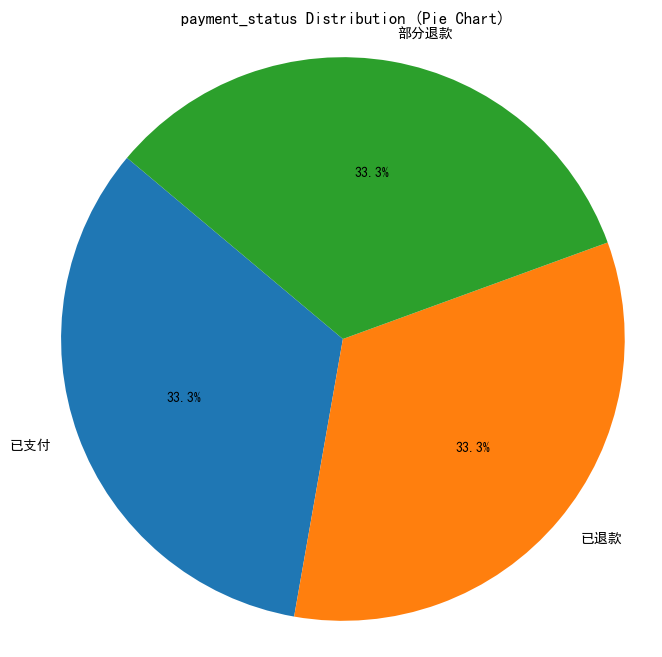

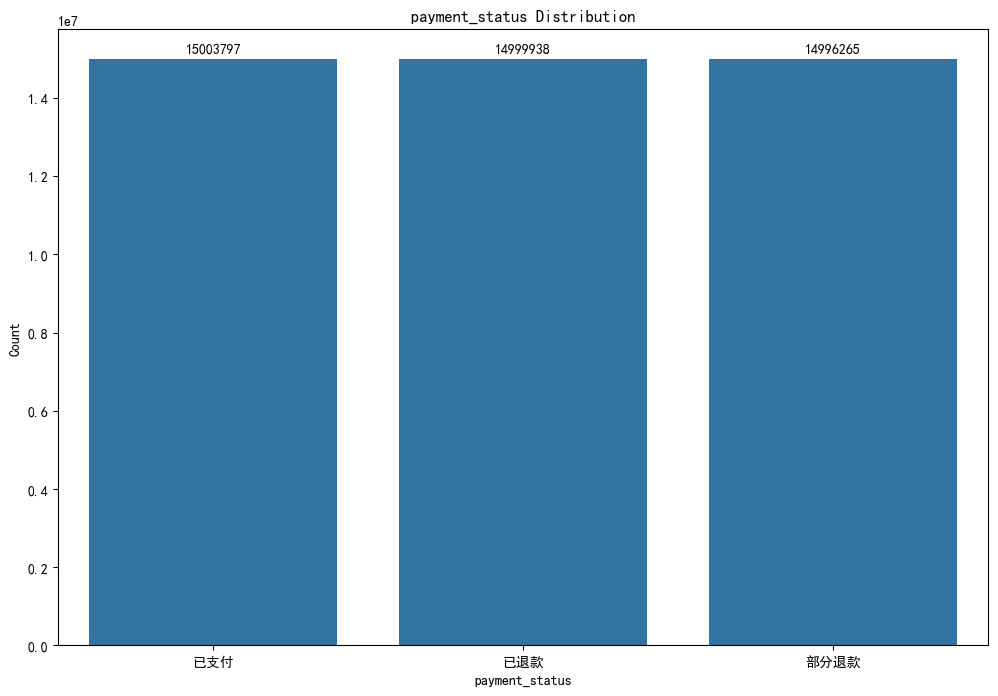

In [11]:
visualizations.draw_pieplot(df,"payment_status")
visualizations.draw_barplot(df,"payment_status")

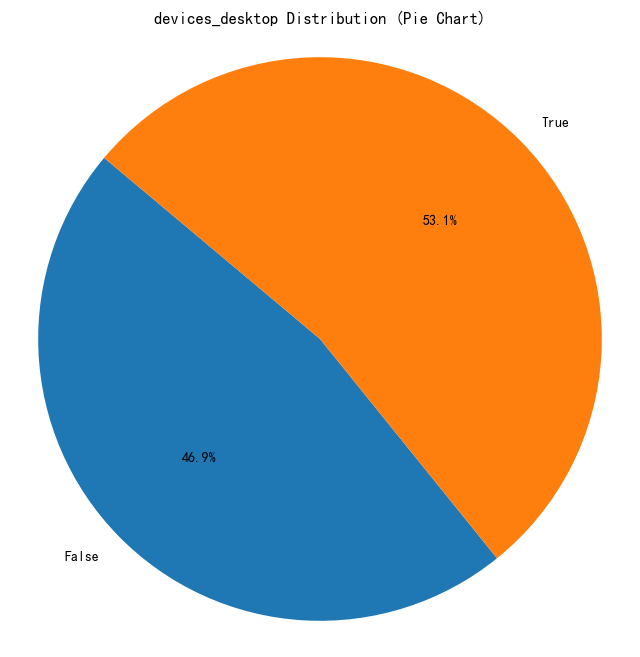

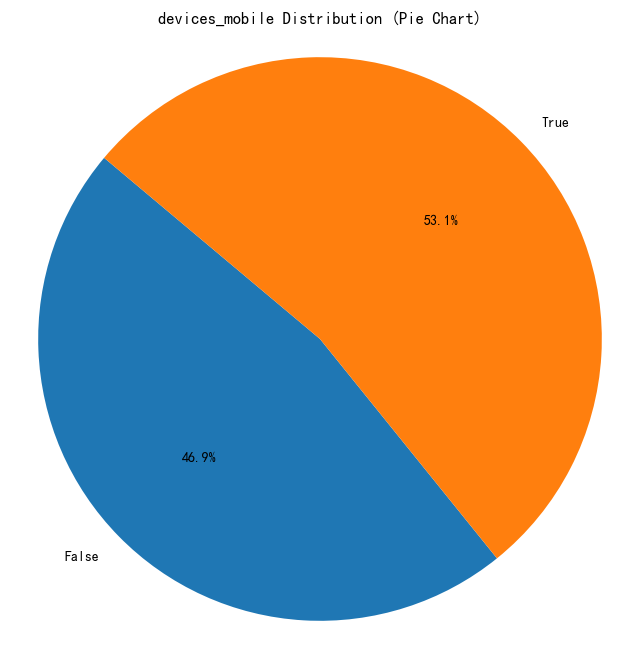

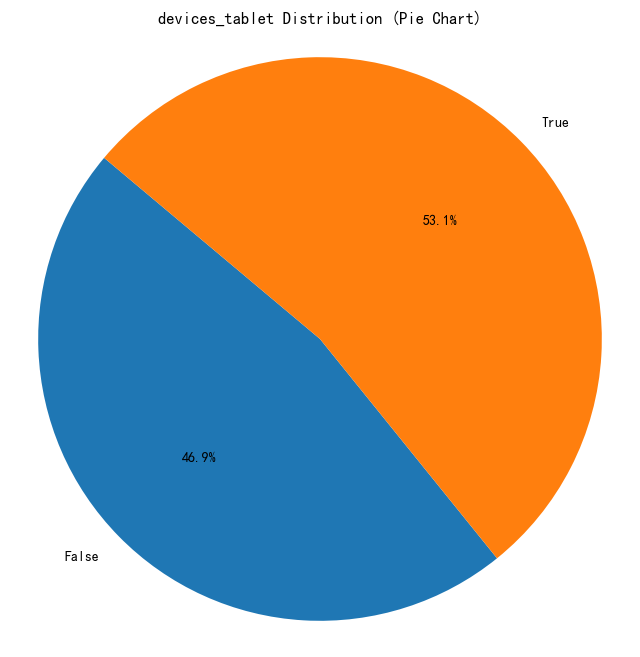

In [12]:
visualizations.draw_pieplot(df,"devices_desktop")
visualizations.draw_pieplot(df,"devices_mobile")
visualizations.draw_pieplot(df,"devices_tablet")

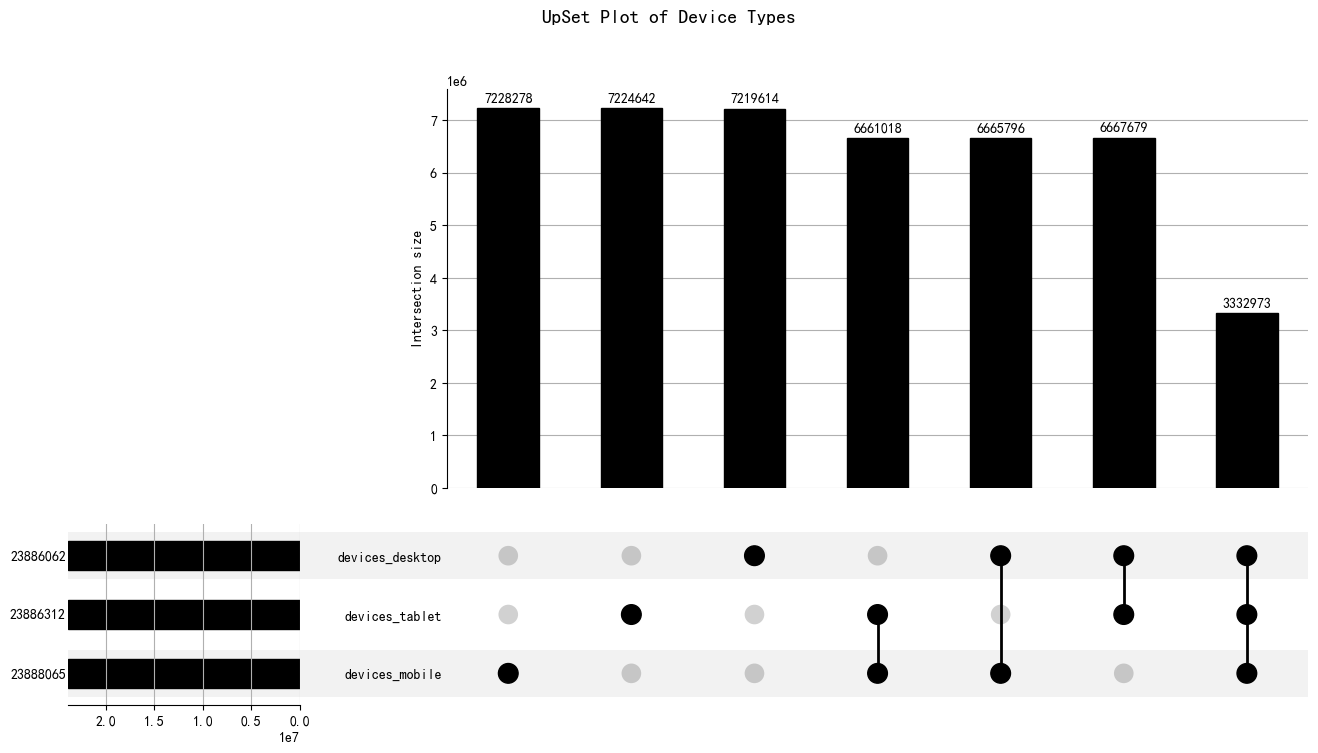

In [6]:
visualizations.draw_upsetplot(df, ["devices_desktop", "devices_mobile", "devices_tablet"], subset_name="Device Types",figsize=(16,8))

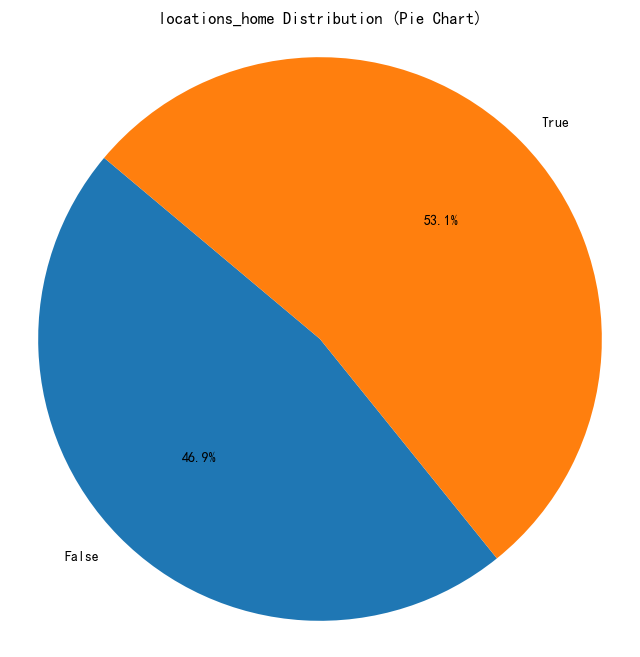

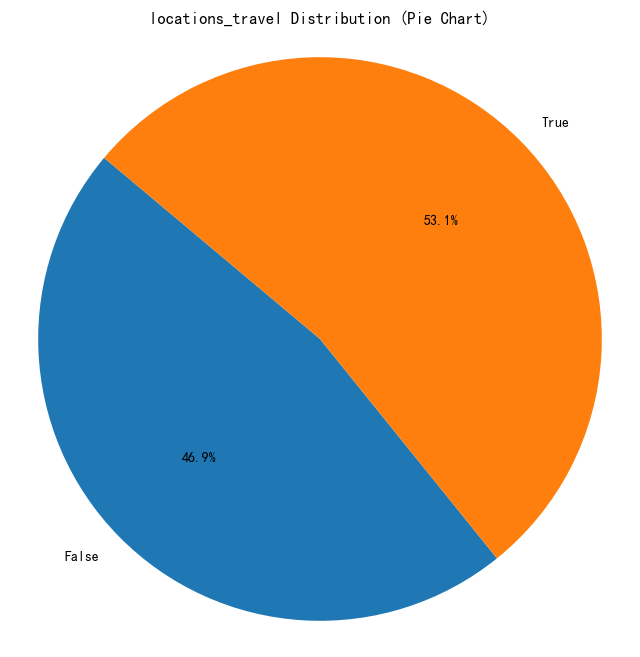

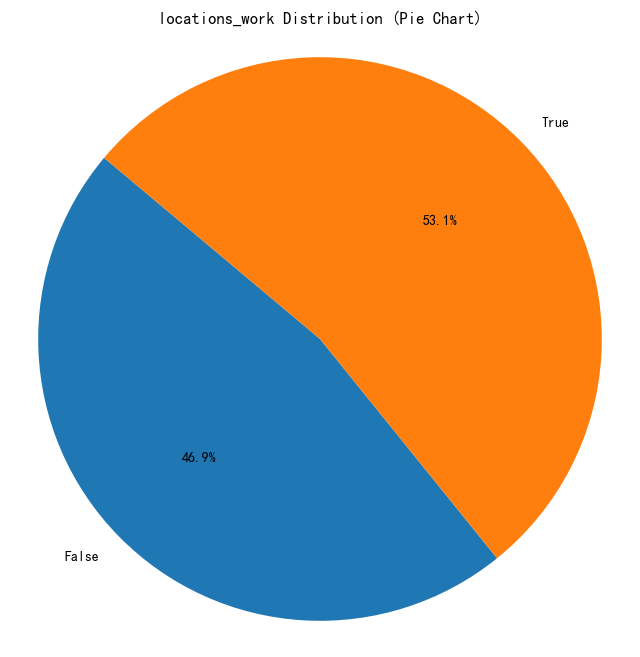

In [10]:
visualizations.draw_pieplot(df,"locations_home")
visualizations.draw_pieplot(df,"locations_travel")
visualizations.draw_pieplot(df,"locations_work")

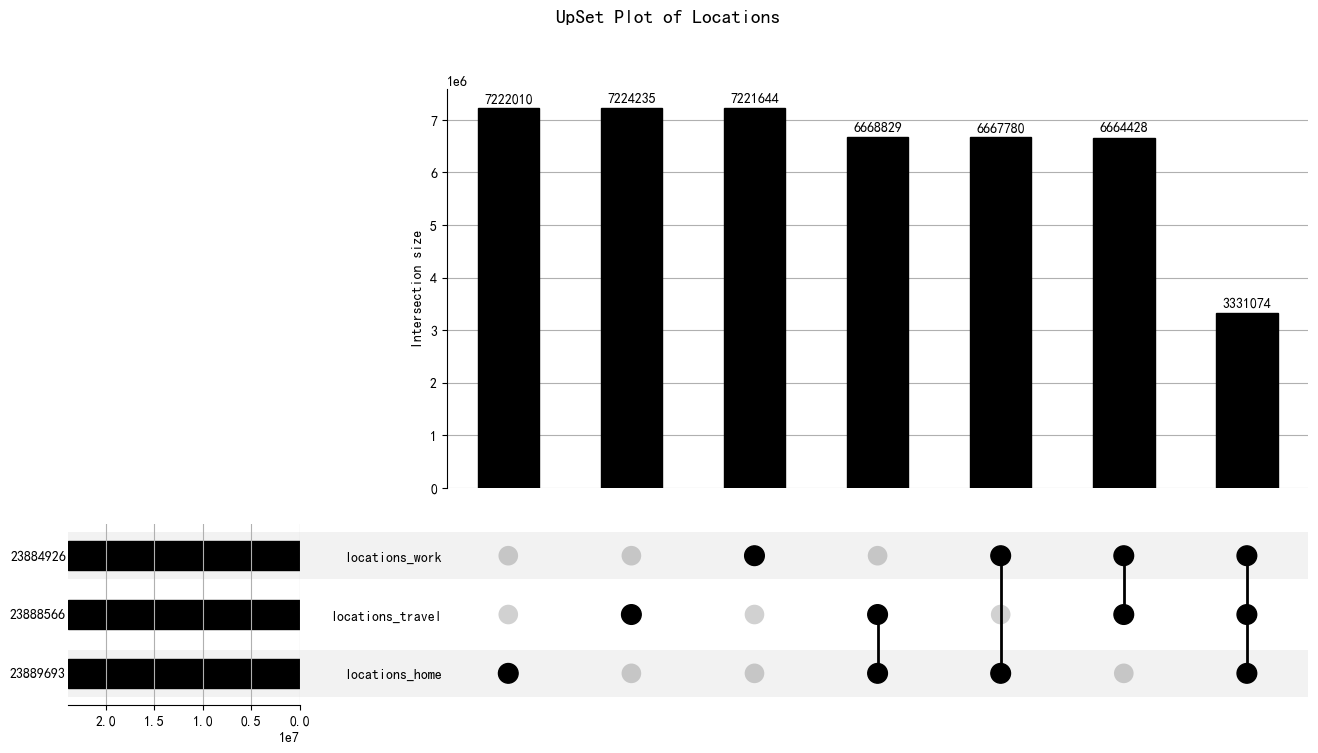

In [11]:
visualizations.draw_upsetplot(df, ["locations_home", "locations_travel", "locations_work"], subset_name="Locations",figsize=(16,8))

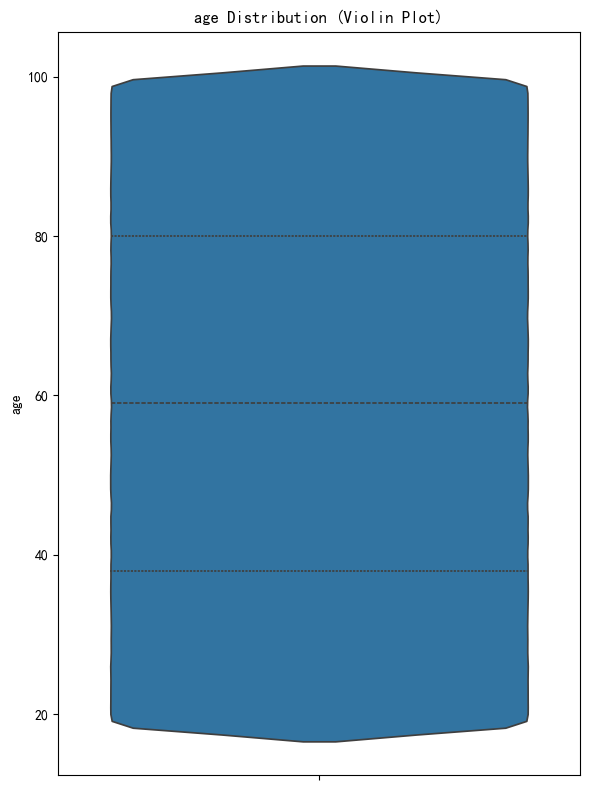

In [7]:
visualizations.draw_violinplot(df, 'age')

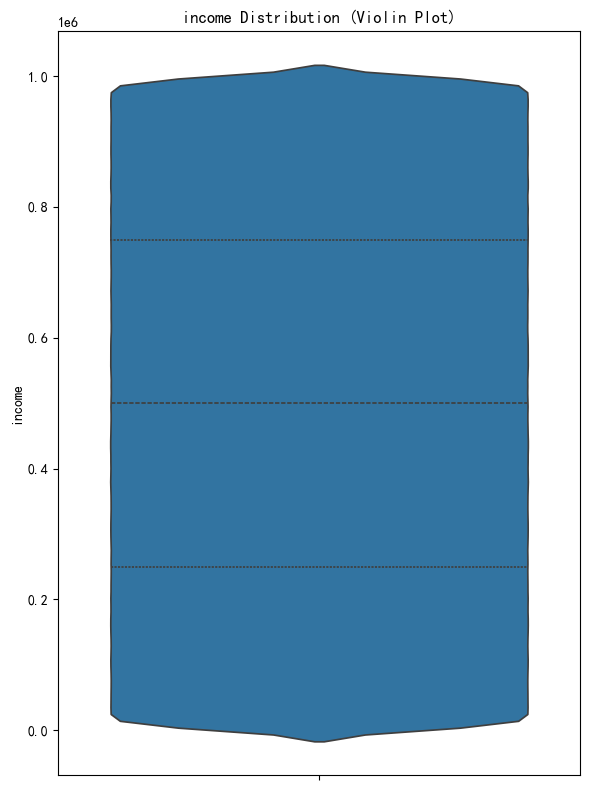

In [8]:
visualizations.draw_violinplot(df, 'income')

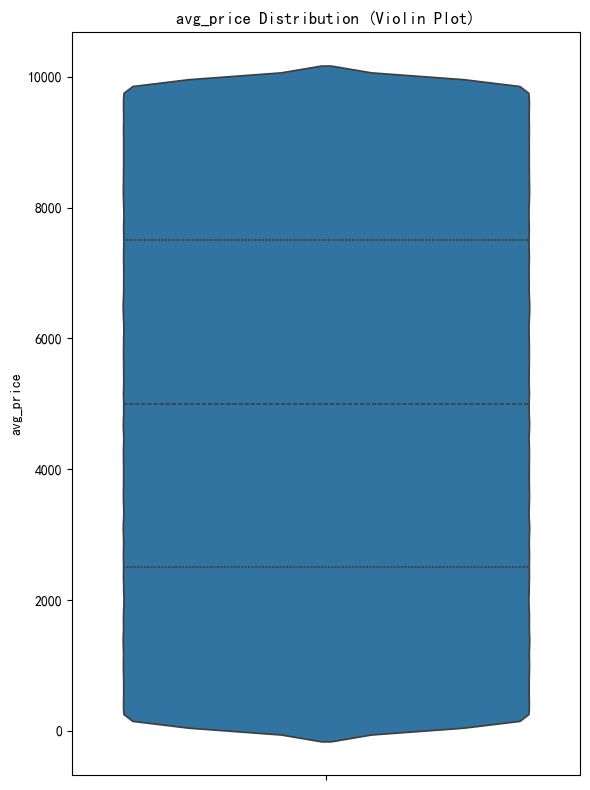

In [9]:
visualizations.draw_violinplot(df, 'avg_price')

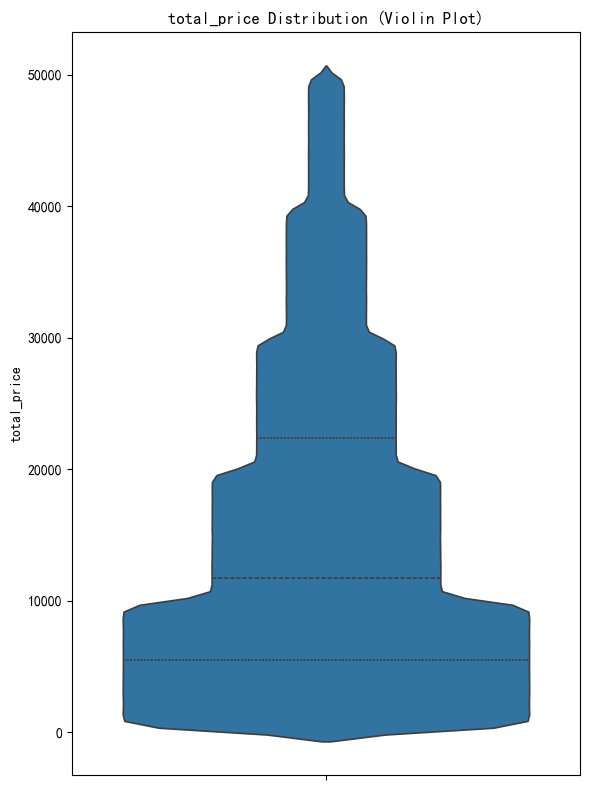

In [12]:
visualizations.draw_violinplot(df, 'total_price')

In [5]:
# 使用IQR进行异常值检测：
for column in ["age", "income", "avg_price", "item_count"]:
    # 计算 Q1 和 Q3
    q1 = df[column].quantile(0.25).compute()
    q3 = df[column].quantile(0.75).compute()

    # 计算 IQR
    iqr = q3 - q1

    # 定义上下限
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 过滤出异常值
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column} q1, q3: {q1}, {q3}")
    print(f"根据{column}检测到的异常值数量：{outliers[column].shape[0].compute()}")

age q1, q3: 38.0, 80.0
根据age检测到的异常值数量：0
income q1, q3: 249980.4475, 750038.835
根据income检测到的异常值数量：0
avg_price q1, q3: 2507.0, 7503.0
根据avg_price检测到的异常值数量：0
item_count q1, q3: 2.0, 4.0
根据item_count检测到的异常值数量：0


In [ ]:
numeric_col = ["age", "income", "avg_price", "item_count", "purchase_date", "avg_session_duration", "first_login","login_count","total_price"]
discrete_col = ["gender", "country", "is_active", "categories", "payment_method", "payment_status", 'devices_desktop','devices_mobile','devices_tablet','locations_home','locations_travel','locations_work',"age_bin", "income_bin", "avg_price_bin", "total_price_bin",]


In [8]:
# 利用Pearson系数计算相关性
for i in range(len(numeric_col)):
    for j in range(i+1, len(numeric_col)):
        corr = df[numeric_col[i]].corr(df[numeric_col[j]]).compute()
        print(f"Pearson correlation {numeric_col[i]} and {numeric_col[j]}: {corr:.8f}")

Pearson correlation age and income: 0.00019492
Pearson correlation age and avg_price: 0.00002776
Pearson correlation age and item_count: -0.00013164
Pearson correlation age and purchase_date: 0.00014747
Pearson correlation age and avg_session_duration: 0.00031313
Pearson correlation age and first_login: 0.00001368
Pearson correlation age and login_count: 0.00003828
Pearson correlation age and total_price: -0.00006903
Pearson correlation income and avg_price: -0.00015365
Pearson correlation income and item_count: 0.00005407
Pearson correlation income and purchase_date: -0.00005042
Pearson correlation income and avg_session_duration: 0.00019918
Pearson correlation income and first_login: 0.00004242
Pearson correlation income and login_count: -0.00001767
Pearson correlation income and total_price: -0.00009190
Pearson correlation avg_price and item_count: 0.00001995
Pearson correlation avg_price and purchase_date: 0.00028190
Pearson correlation avg_price and avg_session_duration: 0.0001431

In [9]:
# 利用卡方计算相关性
for i in range(len(discrete_col)):
    for j in range(i+1, len(discrete_col)):
        chi2, p, dof, expected = utils.x2_test(df, discrete_col[i], discrete_col[j])
        print(f"chi2 and p of {discrete_col[i]} and {discrete_col[j]}: {chi2}, {p}")

chi2 and p of gender and country: 39.97616511747976, 0.051500532981839445
chi2 and p of gender and is_active: 12.712136611384572, 0.005302346063271305
chi2 and p of gender and categories: 113.21251050348972, 0.7252744507504075
chi2 and p of gender and payment_method: 17.384878011752768, 0.4968100839477736
chi2 and p of gender and payment_status: 4.771675251484968, 0.5734132449038831
chi2 and p of gender and devices_desktop: 6.031787171294551, 0.11007391016176565
chi2 and p of gender and devices_mobile: 3.8486179003536254, 0.27828147449188223
chi2 and p of gender and devices_tablet: 4.888828813797883, 0.18012100487200108
chi2 and p of gender and locations_home: 0.7222871519889984, 0.8679496848904305
chi2 and p of gender and locations_travel: 1.413132051239511, 0.7024594131284356
chi2 and p of gender and locations_work: 4.351524402371217, 0.225922510904404
chi2 and p of gender and age_bin: 26.264070271382835, 0.009847068687575018
chi2 and p of gender and income_bin: 12.066488560072084, 0

In [ ]:
# 高价值用户：总消费前20%，总消费<收入，处于活跃状态，所有支付均已完成
large_price = df['total_price'].quantile(0.8).compute()
valuable_customers = df[(df['income'] > df['total_price']) & 
                        (df['is_active'] == True) &
                        (df['total_price'] > large_price) & 
                        (df['payment_status'] == '已支付')][['id', 'income', 'total_price']].compute()

In [6]:
# 将高价值用户导出的id、收入、消费导出为csv
valuable_customers_path= pathlib.Path("./")/("valuable_customers_"+origin_files.name+".csv")
valuable_customers.to_csv(valuable_customers_path,index=False)